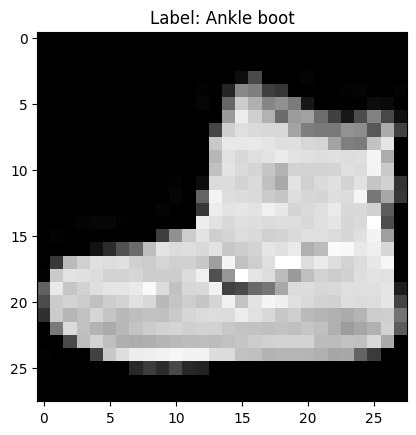

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7664 - loss: 0.6602 - val_accuracy: 0.8640 - val_loss: 0.3688
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8743 - loss: 0.3416 - val_accuracy: 0.8853 - val_loss: 0.3111
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9009 - loss: 0.2770 - val_accuracy: 0.9015 - val_loss: 0.2595
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9107 - loss: 0.2444 - val_accuracy: 0.9035 - val_loss: 0.2593
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9208 - loss: 0.2152 - val_accuracy: 0.9108 - val_loss: 0.2456
313/313 - 1s - 2ms/step - accuracy: 0.9055 - loss: 0.2602



Test accuracy: 0.91


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

#load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

#normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#sample image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.show()

#reshape for CNN (need 4D: batch, height, width, channels)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

#CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

#evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

#save model
model.save("models/fashion_mnist_classifier.h5")
